#Tweet Analytics

In [1]:
import pandas as pd 
import numpy as np

#Authentication module. for documentation  (http://docs.tweepy.org)
import tweepy as tp

#import nltk module 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


#import reguler expression 
import re

#import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Preparation

### Load Data

In [2]:
dataframe = pd.read_csv('clean_tweet (2).csv')
dataframe.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [3]:
dataframe.shape

(1600000, 2)

There was 1.600.000 tweets in this dataset.

### Replacing Name of Columns

In [0]:
dataframe = dataframe.rename(columns={'target':'sentiment'})

In [5]:
dataframe.head()

,text,sentiment
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


### Replacing to Sentiment Values

In [0]:
dataframe.sentiment.replace([0, 1], ['negative', 'positive'], inplace=True)

In [7]:
dataframe.head()

,text,sentiment
0,awww that s a bummer you shoulda got david car...,negative
1,is upset that he can t update his facebook by ...,negative
2,i dived many times for the ball managed to sav...,negative
3,my whole body feels itchy and like its on fire,negative
4,no it s not behaving at all i m mad why am i h...,negative


## Data Preprocessing
Data tweet need to do the preprocessing by many technique preprocess data in order to make an easier analytics.

### Punctuation Removal
This preprocessing data want to remove the punctuation character.<br>
Punctional Character is like '', @, / etc

In [8]:
dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
dataframe.head()

,text,sentiment
0,awww that s a bummer you shoulda got david car...,negative
1,is upset that he can t update his facebook by ...,negative
2,i dived many times for the ball managed to sav...,negative
3,my whole body feels itchy and like its on fire,negative
4,no it s not behaving at all i m mad why am i h...,negative


### Stopword Removal
This preprocessing data want to remove the stopword in the tweets. <br>
stopword is a word that too much in use or like a conjunction that have no meaning.

In [9]:
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
dataframe['text'].head(10)

0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                                     behaving mad see
5                                           whole crew
6                                             need hug
7    hey long time see yes rains bit bit lol fine t...
8                                               k nope
9                                            que muera
Name: text, dtype: object

### Frequents Word Removal
Remove the word that exist in all tweets.

In [10]:
freq = pd.Series(' '.join(dataframe['text']).split()).value_counts()[:20]
freq

good      91355
day       89776
get       82176
like      78582
go        74031
today     68226
work      64960
love      64857
going     64633
got       61454
lol       59276
time      57971
back      56977
u         56380
one       54090
know      52065
im        50670
really    50039
see       46382
night     43965
dtype: int64

In [0]:
frequency = {'day', 'go', 'u', 'one', 'im', 'night','think', 'twitter', 'need', 'still', 'last', 'want', 'think', 'make', 'come', 'look', 'feel', 'friend'}

In [12]:
freq = list(freq.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in frequency))
dataframe['text'].head()

0             awww bummer shoulda got david carr third
1    upset update facebook texting might cry result...
2       dived many times ball managed save rest bounds
3                     whole body feels itchy like fire
4                                     behaving mad see
Name: text, dtype: object

### Rare Words Removal
Remove the words that indicate as a strange word.

In [13]:
rare_word = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-10:]
rare_word

ilikefranchiseking    1
kcoms                 1
aclocal               1
probas                1
cakespy               1
villasenor            1
tvw                   1
catchinnn             1
aspleep               1
icstay                1
dtype: int64

In [14]:
rare_word = list(rare_word.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in freq))
dataframe['text'].head()

0                 awww bummer shoulda david carr third
1    upset update facebook texting might cry result...
2       dived many times ball managed save rest bounds
3                          whole body feels itchy fire
4                                         behaving mad
Name: text, dtype: object

###Spelling Correction
repair the typo word

In [15]:
#Spelling correction
dataframe['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                   www summer should david care third
1    upset update facebook testing might cry result...
2       dived many times ball managed save rest bounds
3                          whole body feels itchy fire
4                                         behaving mad
Name: text, dtype: object

### Tokenization
split word in tweets

In [16]:
TextBlob(dataframe['text'][1]).words

WordList(['upset', 'update', 'facebook', 'texting', 'might', 'cry', 'result', 'school', 'also', 'blah'])

## Data Exploration

In [17]:
#count sentiment 
sentiment = dataframe.groupby(['sentiment'])['sentiment'].count()
sentiment

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['sentiment']
chart.drop(['sentiment'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,sentiment,tweet_count,percent
0,negative,800000,0.5
1,positive,800000,0.5


Text(0.5, 1.0, 'Sentiment Class')

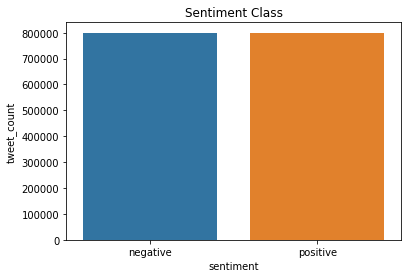

In [18]:
ax = sns.barplot(x= 'sentiment', y='tweet_count', data=chart)
ax.set_title('Sentiment Class')

The positive and negative tweets has the same amount in 8000 tweets

In [0]:
#define positive and negative sentiment
positive = dataframe.loc[dataframe['sentiment'] == "positive"]
negative = dataframe.loc[dataframe['sentiment'] == "negative"]

In [0]:
#merge all sentiment comments into one paragraph
positive_sentiment = "".join(positive.text.values)
negative_sentiment = "".join(negative.text.values)

In [0]:
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

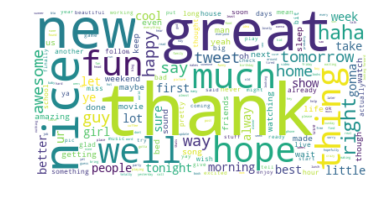

In [22]:
create_word_cloud(positive_sentiment)

In positive statement, word that have the highest frequency is thank, great, nice, weel, fun, love, right, awesome, etc

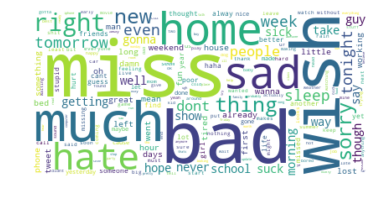

In [23]:
create_word_cloud(negative_sentiment)

In negative statement, word that have the highest frequency is miss, bad, sad.

## Feature Extraction

### Count Vectorizer
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

### TF-IDF vectorizer
The TF-IDV Vectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. 

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english' )

## Split Data
We want to split the data by data testing and data training to make a modelling.

In [0]:
X = dataframe['text']
y = dataframe['sentiment']

In [0]:
#countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

#tfidf vectorizer
X_tfidf = tfidf.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.2, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

## Modelling

Modelling that we want to use in this case is classification modelling using Logistic Regression, NaiveBayer and Random Forest Classifier Algorithm.

### Logistic Regression

**Logistic regression** is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis. 

In this case, we know that we've done to divide the data to data train and data test. And we also define the X variable as variable independent which is the text or the tweet and Y as variable dependent which is the sentiment result.

Now, with Logistic Regression by the data train and data test, we want to know how much the relationship of make a sentiment by tweet.

In [33]:
from sklearn.linear_model import LogisticRegression
# Countvectorizer 
Lr_vect = LogisticRegression()
Lr_vect.fit(train_X_vectorizer,train_y)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Naive Bayes
**Naive Bayes** is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. 

In [0]:
from sklearn.naive_bayes import MultinomialNB
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)

In [0]:
# TFIDFVectorizer
#from sklearn.naive_bayes import GaussianNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)

## Model Evaluation

In this part, model evaluation can be seen by using accuracy, precision, recall and F_measure. 

- **Accuracy** is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.
- **Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations. 
- **Recall** (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
- **F_measure** (F1 score)<br>
F1 Score is the weighted average of Precision and Recall.

### Logistic Regression

In [0]:
#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
# using count vectorizer
print("______________ Countvectorizer ______________")


# Lr_clf_vec_report_train = classification_report(train_y, Lr_pred_vect_train)
# Lr_clf_vec_report_test = classification_report(test_y, Lr_pred_vect_test)

# Lr_confmatrix_vect_train = confusion_matrix(train_y, Lr_pred_vect_train) 
# Lr_confmatrix_vect_test = confusion_matrix(test_y, Lr_pred_vect_test)

Lr_recall_vec_train = recall_score(train_y, Lr_pred_vect_train, average="micro")
Lr_recall_vec_test = recall_score(test_y, Lr_pred_vect_test,average="micro") 

Lr_precision_vec_train = precision_score(train_y, Lr_pred_vect_train,average="micro")
Lr_precision_vec_test = precision_score(test_y, Lr_pred_vect_test,average="micro")

Lr_f1_score_vec_train = f1_score(train_y, Lr_pred_vect_train,average="micro")
Lr_f1_score_vec_test = f1_score(test_y,Lr_pred_vect_test,average="micro")

print('Information :')
# print('Confusion matrix for Train :')
# print(Lr_confmatrix_vect_train,'\n')
# print('Confusion matrix for Test :')
# print(Lr_confmatrix_vect_test,'\n')
# print('Classification Refort for Train :')
# print(Lr_clf_vec_report_train,'\n')
# print('Classification Refort for Test :')
# print(Lr_clf_vec_report_test,'\n')
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 79.75% & 76.25%
Precision train & test  : 79.75% & 76.25%
F1 Score train & test   : 79.75% & 76.25%


In [41]:
# using count vectorizer
print("______________ TF-IDF ______________")


Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 78.89% & 76.44%
Precision train & test  : 78.89% & 76.44%
F1 Score train & test   : 78.89% & 76.25%


### Naive Bayes

In [42]:
# find model evaluation for naive bayes
# using count vectorizer
print("______________ Countvectorizer ______________")


NB_recall_vec_train = recall_score(train_y, NB_pred_vect_train, average="micro")
NB_recall_vec_test = recall_score(test_y, NB_pred_vect_test,average="micro") 

NB_precision_vec_train = precision_score(train_y, NB_pred_vect_train,average="micro")
NB_precision_vec_test = precision_score(test_y, NB_pred_vect_test,average="micro")

NB_f1_score_vec_train = f1_score(train_y, NB_pred_vect_train,average="micro")
NB_f1_score_vec_test = f1_score(test_y,NB_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 78.60% & 75.65%
Precision train & test  : 78.60% & 75.65%
F1 Score train & test   : 78.60% & 75.65%


In [43]:
# using count vectorizer
print("______________ TF-IDF ______________")


NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(test_y,NB_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 78.65% & 75.09%
Precision train & test  : 78.65% & 75.09%
F1 Score train & test   : 78.65% & 75.65%


## Conclussion

There was 1.600.000 tweets in this dataset. Where the sentiment has been done for all tweets. 

The result is **symmetric dataset** with Positive tweets with 50% of data and Negative 50% tweets with 50% of data. 

The result of **positive sentiment**, word that have the highest frequency is thank, great, nice, weel, fun, love, right, awesome, etc.

The result **negative sentiment**, word that have the highest frequency is miss, bad, sad.



In this case, we know that we've done to divide the data to data train and data test. And we also define the X variable as variable independent which is the text or the tweet and Y as variable dependent which is the sentiment result.

Now, with Logistic Regression and Naive Bayes by the data train and data test, we want to know how much the relationship of make a sentiment by tweet.

By testing both of the algorithm, **Logistic Regression model is better than than Naive Bayes model.** Because the values of Logistic Regression recall, precission , F1 score is higher than Naive Bayes.

Count Vectorizer also shown the higher value of recall, precission , F1 score than TF-IDF vectorizer**

**So, we can use the naive bayes model and Count Vectorizer to test the new data.**